In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def kernel(point,xmat,k):
  m,n = np.shape(xmat)
  weights = np.mat(np.eye((m)))
  for j in range(m):
    diff=point-X[j]
    weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
  return weights

In [12]:
def localweight(point,xmat,ymat,k):
  wei = kernel(point,xmat,k)
  w = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
  return w

In [13]:
def localweightregression(xmat,ymat,k):
  m,n = np.shape(xmat)
  ypred = np.zeros(m)
  for i in range(m):
    ypred[i] = xmat[i]*localweight(xmat[i],xmat,ymat,k)
  return ypred

In [14]:
def graphplot(X,ypred):
  SortIndex = X[:,1].argsort(0)
  XSort = X[SortIndex][:,0]
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  ax.scatter(bill,tip,color='green')
  ax.plot(XSort[:,1],ypred[SortIndex],color='red',linewidth=5)
  plt.xlabel('Total_bill')
  plt.ylabel('Tip')
  plt.show()

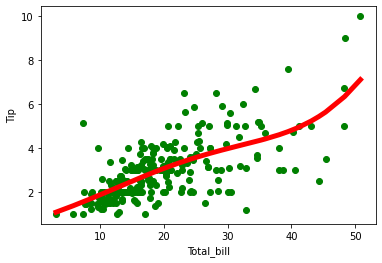

In [15]:
data=pd.read_csv('/content/10data_tips.csv')
bill=np.array(data.total_bill)
tip=np.array(data.tip)
mbill=np.mat(bill)
mtip=np.mat(tip)
m = np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))
ypred = localweightregression(X,mtip,8)
graphplot(X,ypred)